<a href="https://colab.research.google.com/github/RostekA/data-science/blob/master/CNN_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Dropout, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

## Load Data

In [ ]:
cifar = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar.load_data()

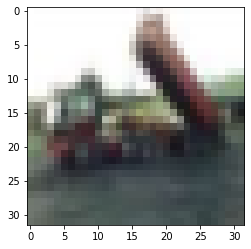

In [ ]:
plt.imshow(X_train[2]);

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
# number of classes
k = len(set(y_train))
print(k)

10


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(k, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

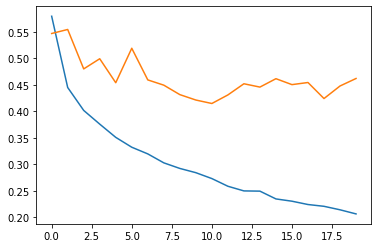

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

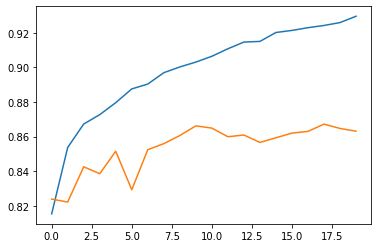

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

## Training with data augmentation

In [ ]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=20)

Epoch 1/20
1562/1562 [==============================] - 35s 23ms/step - loss: 1.3432 - accuracy: 0.5289 - val_loss: 1.2201 - val_accuracy: 0.5943
Epoch 2/20
1562/1562 [==============================] - 35s 23ms/step - loss: 0.9103 - accuracy: 0.6816 - val_loss: 0.9263 - val_accuracy: 0.6879
Epoch 3/20
1562/1562 [==============================] - 35s 22ms/step - loss: 0.7711 - accuracy: 0.7324 - val_loss: 0.7596 - val_accuracy: 0.7514
Epoch 4/20
1562/1562 [==============================] - 35s 22ms/step - loss: 0.6901 - accuracy: 0.7630 - val_loss: 0.6464 - val_accuracy: 0.7805
Epoch 5/20
1562/1562 [==============================] - 35s 22ms/step - loss: 0.6331 - accuracy: 0.7819 - val_loss: 0.6549 - val_accuracy: 0.7804
Epoch 6/20
1562/1562 [==============================] - 34s 22ms/step - loss: 0.5840 - accuracy: 0.8014 - val_loss: 0.5887 - val_accuracy: 0.8009
Epoch 7/20
1562/1562 [==============================] - 35s 22ms/step - loss: 0.5419 - accuracy: 0.8157 - val_loss: 0.6119 -

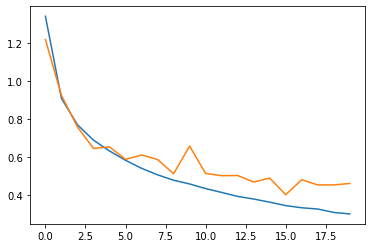

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

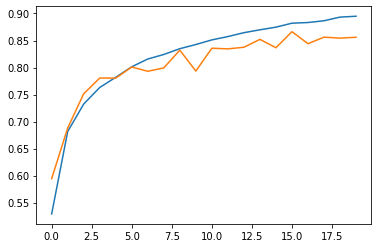

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

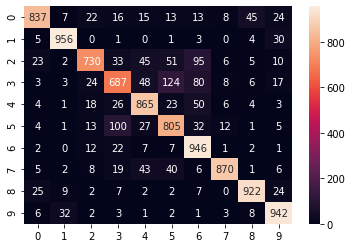

In [ ]:
predictions = model.predict(X_test).argmax(axis=1)
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d');